In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from typing import Callable

torch.manual_seed(0)
class TopK(nn.Module):
    def __init__(self, k: int, postact_fn: Callable = nn.ReLU()) -> None:
        super().__init__()
        self.k = k
        self.postact_fn = postact_fn

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        topk = torch.topk(x, k=self.k, dim=-1)
        values = self.postact_fn(topk.values)
        # make all other values 0
        result = torch.zeros_like(x)
        result.scatter_(-1, topk.indices, values)
        return result

    def state_dict(self, destination=None, prefix="", keep_vars=False):
        state_dict = super().state_dict(destination, prefix, keep_vars)
        state_dict.update({prefix + "k": self.k, prefix + "postact_fn": self.postact_fn.__class__.__name__})
        return state_dict

    @classmethod
    def from_state_dict(cls, state_dict: dict[str, torch.Tensor], strict: bool = True) -> "TopK":
        k = state_dict["k"]
        postact_fn = ACTIVATIONS_CLASSES[state_dict["postact_fn"]]()
        return cls(k=k, postact_fn=postact_fn)
ACTIVATIONS_CLASSES = {
    "ReLU": nn.ReLU,
    "Identity": nn.Identity,
    "TopK": TopK,
}
class Top_K_SAE(nn.Module):

  def __init__(self,in_channels,out_channels):
    super().__init__()
    self.W_enc=nn.Linear(in_channels,out_channels,bias=False)
    self.W_dec=TiedTranspose(self.W_enc)
    self.b_pre=nn.Parameter(torch.zeros(in_channels))
    self.b_latent=nn.Parameter(torch.zeros(out_channels))





  def forward(self,x,k):
    encoded = self.W_enc(x - self.b_pre) + self.b_latent
    T=TopK(k=k)
    encoded=T(encoded)

    # Reshape to (batch_size, k)
    f = self.W_dec(encoded) + self.b_pre  # Use y.values, which contains the top k values

    loss = (((f - x) ** 2).mean(dim=1) / (x**2).mean(dim=1)
    ).mean()

    return loss,f,encoded
class TiedTranspose(nn.Module):
    def __init__(self, linear: nn.Linear):
        super().__init__()
        self.linear = linear

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        assert self.linear.bias is None
        return F.linear(x, self.linear.weight.t(), None)

    @property
    def weight(self) -> torch.Tensor:
        return self.linear.weight.t()

    @property
    def bias(self) -> torch.Tensor:
        return self.linear.bias




import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class ActivationDataset(Dataset):


    def __init__(self, data_tensor: torch.Tensor):
        """
        data_tensor: shape [N, C], where N is the number of activation vectors
        """
        self.data = data_tensor

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        # Return a single activation vector at position idx
        return self.data[idx]
from google.colab import drive
drive.mount('/content/drive')
#final_tensor_loaded = torch.load("/content/drive/MyDrive/TOP_k_SAE_mixed4a_3x3_tensor_dataset.pt")
# Then wrap it in the dataset:+
#loaded_dataset = ActivationDataset(final_tensor_loaded)
device=torch.device('cpu')
#dataloader = DataLoader(loaded_dataset, batch_size=500000, num_workers=4, pin_memory=True)
#model=Top_K_SAE(204,3264).to(device)

model=Top_K_SAE(512,8192).to(device)
model_1=Top_K_SAE(512,8192).to(device)
model_2=Top_K_SAE(528,8448).to(device)


optimizer=optim.Adam(model.parameters(),lr=0.001)

#for epoch in range(100):
    #total_loss = 0
    #for batch in dataloader:
        #optimizer.zero_grad()  # Reset gradients HERE
       # loss, _, _ = model(batch.to(device), k=32)
        #loss.backward()        # Backpropagate
        #optimizer.step()       # Update weights
        #total_loss += loss.item()  # Track loss as scalar
    #print(f"Epoch {epoch}, Loss: {total_loss}")
    #torch.cuda.empty_cache()  # Optional: Clear cache
#torch.save(model.state_dict(), "/content/drive/MyDrive/TopK_SAE_for_Mixed4a_3x3.pth")

Mounted at /content/drive


In [ ]:
model.load_state_dict(torch.load("/content/TOP_k_SAE_mixed4c.pth", map_location=device))
model_1.load_state_dict(torch.load("/content/TOP_k_SAE_mixed4b (1).pth", map_location=device))
model_2.load_state_dict(torch.load("/content/TopK_SAE_for_Mixed4d.pth", map_location=device))

<ipython-input-4-3601c76126ad>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/TOP_k_SAE_mixed4c.pth", map_location=device))
<ipy

<All keys matched successfully>

In [ ]:
pip install torch-lucent

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 22.2 MB/s eta 0:00:00
   ━━

In [ ]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from lucent.modelzoo.inceptionv1 import helper_layers


model_urls = {
    # InceptionV1 model used in Lucid examples, converted by ProGamerGov
    'inceptionv1': 'https://github.com/ProGamerGov/pytorch-old-tensorflow-models/raw/master/inception5h.pth',
}


class InceptionV1(nn.Module):

    def __init__(self, pretrained=False, progress=True, redirected_ReLU=True):
        super(InceptionV1, self).__init__()
        self.conv2d0_pre_relu_conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(7, 7), stride=(2, 2), groups=1, bias=True)
        self.conv2d1_pre_relu_conv = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.conv2d2_pre_relu_conv = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed3a_1x1_pre_relu_conv = nn.Conv2d(in_channels=192, out_channels=64, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed3a_3x3_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=192, out_channels=96, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed3a_5x5_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=192, out_channels=16, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed3a_pool_reduce_pre_relu_conv = nn.Conv2d(in_channels=192, out_channels=32, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed3a_3x3_pre_relu_conv = nn.Conv2d(in_channels=96, out_channels=128, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed3a_5x5_pre_relu_conv = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(5, 5), stride=(1, 1), groups=1, bias=True)
        self.mixed3b_1x1_pre_relu_conv = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed3b_3x3_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed3b_5x5_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=256, out_channels=32, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed3b_pool_reduce_pre_relu_conv = nn.Conv2d(in_channels=256, out_channels=64, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed3b_3x3_pre_relu_conv = nn.Conv2d(in_channels=128, out_channels=192, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed3b_5x5_pre_relu_conv = nn.Conv2d(in_channels=32, out_channels=96, kernel_size=(5, 5), stride=(1, 1), groups=1, bias=True)
        self.mixed4a_1x1_pre_relu_conv = nn.Conv2d(in_channels=480, out_channels=192, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4a_3x3_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=480, out_channels=96, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4a_5x5_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=480, out_channels=16, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4a_pool_reduce_pre_relu_conv = nn.Conv2d(in_channels=480, out_channels=64, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4a_3x3_pre_relu_conv = nn.Conv2d(in_channels=96, out_channels=204, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed4a_5x5_pre_relu_conv = nn.Conv2d(in_channels=16, out_channels=48, kernel_size=(5, 5), stride=(1, 1), groups=1, bias=True)
        self.mixed4b_1x1_pre_relu_conv = nn.Conv2d(in_channels=508, out_channels=160, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4b_3x3_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=508, out_channels=112, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4b_5x5_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=508, out_channels=24, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4b_pool_reduce_pre_relu_conv = nn.Conv2d(in_channels=508, out_channels=64, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4b_3x3_pre_relu_conv = nn.Conv2d(in_channels=112, out_channels=224, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed4b_5x5_pre_relu_conv = nn.Conv2d(in_channels=24, out_channels=64, kernel_size=(5, 5), stride=(1, 1), groups=1, bias=True)
        self.mixed4c_1x1_pre_relu_conv = nn.Conv2d(in_channels=512, out_channels=128, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4c_3x3_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=512, out_channels=128, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4c_5x5_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=512, out_channels=24, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4c_pool_reduce_pre_relu_conv = nn.Conv2d(in_channels=512, out_channels=64, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4c_3x3_pre_relu_conv = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed4c_5x5_pre_relu_conv = nn.Conv2d(in_channels=24, out_channels=64, kernel_size=(5, 5), stride=(1, 1), groups=1, bias=True)
        self.mixed4d_1x1_pre_relu_conv = nn.Conv2d(in_channels=512, out_channels=112, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4d_3x3_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=512, out_channels=144, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4d_5x5_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=512, out_channels=32, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4d_pool_reduce_pre_relu_conv = nn.Conv2d(in_channels=512, out_channels=64, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4d_3x3_pre_relu_conv = nn.Conv2d(in_channels=144, out_channels=288, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed4d_5x5_pre_relu_conv = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5, 5), stride=(1, 1), groups=1, bias=True)
        self.mixed4e_1x1_pre_relu_conv = nn.Conv2d(in_channels=528, out_channels=256, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4e_3x3_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=528, out_channels=160, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4e_5x5_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=528, out_channels=32, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4e_pool_reduce_pre_relu_conv = nn.Conv2d(in_channels=528, out_channels=128, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed4e_3x3_pre_relu_conv = nn.Conv2d(in_channels=160, out_channels=320, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed4e_5x5_pre_relu_conv = nn.Conv2d(in_channels=32, out_channels=128, kernel_size=(5, 5), stride=(1, 1), groups=1, bias=True)
        self.mixed5a_1x1_pre_relu_conv = nn.Conv2d(in_channels=832, out_channels=256, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed5a_3x3_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=832, out_channels=160, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed5a_5x5_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=832, out_channels=48, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed5a_pool_reduce_pre_relu_conv = nn.Conv2d(in_channels=832, out_channels=128, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed5a_3x3_pre_relu_conv = nn.Conv2d(in_channels=160, out_channels=320, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed5a_5x5_pre_relu_conv = nn.Conv2d(in_channels=48, out_channels=128, kernel_size=(5, 5), stride=(1, 1), groups=1, bias=True)
        self.mixed5b_1x1_pre_relu_conv = nn.Conv2d(in_channels=832, out_channels=384, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed5b_3x3_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=832, out_channels=192, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed5b_5x5_bottleneck_pre_relu_conv = nn.Conv2d(in_channels=832, out_channels=48, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed5b_pool_reduce_pre_relu_conv = nn.Conv2d(in_channels=832, out_channels=128, kernel_size=(1, 1), stride=(1, 1), groups=1, bias=True)
        self.mixed5b_3x3_pre_relu_conv = nn.Conv2d(in_channels=192, out_channels=384, kernel_size=(3, 3), stride=(1, 1), groups=1, bias=True)
        self.mixed5b_5x5_pre_relu_conv = nn.Conv2d(in_channels=48, out_channels=128, kernel_size=(5, 5), stride=(1, 1), groups=1, bias=True)
        self.softmax2_pre_activation_matmul = nn.Linear(in_features=1024, out_features=1008, bias=True)

        self.add_layers(redirected_ReLU)

        if pretrained:
            self.load_state_dict(torch.hub.load_state_dict_from_url(model_urls['inceptionv1'], progress=progress))

    def add_layers(self, redirected_ReLU=True):
        if redirected_ReLU:
            relu = helper_layers.RedirectedReluLayer
        else:
            relu = helper_layers.ReluLayer
        self.conv2d0 = relu()
        self.maxpool0 = helper_layers.MaxPool2dLayer()
        self.conv2d1 = relu()
        self.conv2d2 = relu()
        self.maxpool1 = helper_layers.MaxPool2dLayer()
        self.mixed3a_pool = helper_layers.MaxPool2dLayer()
        self.mixed3a_1x1 = relu()
        self.mixed3a_3x3_bottleneck = relu()
        self.mixed3a_5x5_bottleneck = relu()
        self.mixed3a_pool_reduce = relu()
        self.mixed3a_3x3 = relu()
        self.mixed3a_5x5 = relu()
        self.mixed3a = helper_layers.CatLayer()
        self.mixed3b_pool = helper_layers.MaxPool2dLayer()
        self.mixed3b_1x1 = relu()
        self.mixed3b_3x3_bottleneck = relu()
        self.mixed3b_5x5_bottleneck = relu()
        self.mixed3b_pool_reduce = relu()
        self.mixed3b_3x3 = relu()
        self.mixed3b_5x5 = relu()
        self.mixed3b = helper_layers.CatLayer()
        self.maxpool4 = helper_layers.MaxPool2dLayer()
        self.mixed4a_pool = helper_layers.MaxPool2dLayer()
        self.mixed4a_1x1 = relu()
        self.mixed4a_3x3_bottleneck = relu()
        self.mixed4a_5x5_bottleneck = relu()
        self.mixed4a_pool_reduce = relu()
        self.mixed4a_3x3 = relu()
        self.mixed4a_5x5 = relu()
        self.mixed4a = helper_layers.CatLayer()
        self.mixed4b_pool = helper_layers.MaxPool2dLayer()
        self.mixed4b_1x1 = relu()
        self.mixed4b_3x3_bottleneck = relu()
        self.mixed4b_5x5_bottleneck = relu()
        self.mixed4b_pool_reduce = relu()
        self.mixed4b_3x3 = relu()
        self.mixed4b_5x5 = relu()
        self.mixed4b = helper_layers.CatLayer()
        self.mixed4c_pool = helper_layers.MaxPool2dLayer()
        self.mixed4c_1x1 = relu()
        self.mixed4c_3x3_bottleneck = relu()
        self.mixed4c_5x5_bottleneck = relu()
        self.mixed4c_pool_reduce = relu()
        self.mixed4c_3x3 = relu()
        self.mixed4c_5x5 = relu()
        self.mixed4c = helper_layers.CatLayer()
        self.mixed4d_pool = helper_layers.MaxPool2dLayer()
        self.mixed4d_1x1 = relu()
        self.mixed4d_3x3_bottleneck = relu()
        self.mixed4d_5x5_bottleneck = relu()
        self.mixed4d_pool_reduce = relu()
        self.mixed4d_3x3 = relu()
        self.mixed4d_5x5 = relu()
        self.mixed4d = helper_layers.CatLayer()
        self.mixed4e_pool = helper_layers.MaxPool2dLayer()
        self.mixed4e_1x1 = relu()
        self.mixed4e_3x3_bottleneck = relu()
        self.mixed4e_5x5_bottleneck = relu()
        self.mixed4e_pool_reduce = relu()
        self.mixed4e_3x3 = relu()
        self.mixed4e_5x5 = relu()
        self.mixed4e = helper_layers.CatLayer()
        self.maxpool10 = helper_layers.MaxPool2dLayer()
        self.mixed5a_pool = helper_layers.MaxPool2dLayer()
        self.mixed5a_1x1 = relu()
        self.mixed5a_3x3_bottleneck = relu()
        self.mixed5a_5x5_bottleneck = relu()
        self.mixed5a_pool_reduce = relu()
        self.mixed5a_3x3 = relu()
        self.mixed5a_5x5 = relu()
        self.mixed5a = helper_layers.CatLayer()
        self.mixed5b_pool = helper_layers.MaxPool2dLayer()
        self.mixed5b_1x1 = relu()
        self.mixed5b_3x3_bottleneck = relu()
        self.mixed5b_5x5_bottleneck = relu()
        self.mixed5b_pool_reduce = relu()
        self.mixed5b_3x3 = relu()
        self.mixed5b_5x5 = relu()
        self.mixed5b = helper_layers.CatLayer()
        self.softmax2 = helper_layers.SoftMaxLayer()

    def forward(self, x):
        conv2d0_pre_relu_conv_pad = F.pad(x, (2, 3, 2, 3))
        conv2d0_pre_relu_conv = self.conv2d0_pre_relu_conv(conv2d0_pre_relu_conv_pad)
        conv2d0 = self.conv2d0(conv2d0_pre_relu_conv)
        maxpool0_pad = F.pad(conv2d0, (0, 1, 0, 1), value=float('-inf'))
        maxpool0 = self.maxpool0(maxpool0_pad, kernel_size=(3, 3), stride=(2, 2), padding=0, ceil_mode=False)
        localresponsenorm0 = F.local_response_norm(maxpool0, size=10, alpha=10 * 0.00009999999747378752, beta=0.5, k=2)
        conv2d1_pre_relu_conv = self.conv2d1_pre_relu_conv(localresponsenorm0)
        conv2d1 = self.conv2d1(conv2d1_pre_relu_conv)
        conv2d2_pre_relu_conv_pad = F.pad(conv2d1, (1, 1, 1, 1))
        conv2d2_pre_relu_conv = self.conv2d2_pre_relu_conv(conv2d2_pre_relu_conv_pad)
        conv2d2 = self.conv2d2(conv2d2_pre_relu_conv)
        localresponsenorm1 = F.local_response_norm(conv2d2, size=10, alpha=10 * 0.00009999999747378752, beta=0.5, k=2)
        maxpool1_pad = F.pad(localresponsenorm1, (0, 1, 0, 1), value=float('-inf'))
        maxpool1 = self.maxpool1(maxpool1_pad, kernel_size=(3, 3), stride=(2, 2), padding=0, ceil_mode=False)
        mixed3a_1x1_pre_relu_conv = self.mixed3a_1x1_pre_relu_conv(maxpool1)
        mixed3a_3x3_bottleneck_pre_relu_conv = self.mixed3a_3x3_bottleneck_pre_relu_conv(maxpool1)
        mixed3a_5x5_bottleneck_pre_relu_conv = self.mixed3a_5x5_bottleneck_pre_relu_conv(maxpool1)
        mixed3a_pool_pad = F.pad(maxpool1, (1, 1, 1, 1), value=float('-inf'))
        mixed3a_pool = self.mixed3a_pool(mixed3a_pool_pad, kernel_size=(3, 3), stride=(1, 1), padding=0, ceil_mode=False)
        mixed3a_1x1 = self.mixed3a_1x1(mixed3a_1x1_pre_relu_conv)
        mixed3a_3x3_bottleneck = self.mixed3a_3x3_bottleneck(mixed3a_3x3_bottleneck_pre_relu_conv)
        mixed3a_5x5_bottleneck = self.mixed3a_5x5_bottleneck(mixed3a_5x5_bottleneck_pre_relu_conv)
        mixed3a_pool_reduce_pre_relu_conv = self.mixed3a_pool_reduce_pre_relu_conv(mixed3a_pool)
        mixed3a_3x3_pre_relu_conv_pad = F.pad(mixed3a_3x3_bottleneck, (1, 1, 1, 1))
        mixed3a_3x3_pre_relu_conv = self.mixed3a_3x3_pre_relu_conv(mixed3a_3x3_pre_relu_conv_pad)
        mixed3a_5x5_pre_relu_conv_pad = F.pad(mixed3a_5x5_bottleneck, (2, 2, 2, 2))
        mixed3a_5x5_pre_relu_conv = self.mixed3a_5x5_pre_relu_conv(mixed3a_5x5_pre_relu_conv_pad)
        mixed3a_pool_reduce = self.mixed3a_pool_reduce(mixed3a_pool_reduce_pre_relu_conv)
        mixed3a_3x3 = self.mixed3a_3x3(mixed3a_3x3_pre_relu_conv)
        mixed3a_5x5 = self.mixed3a_5x5(mixed3a_5x5_pre_relu_conv)
        mixed3a = self.mixed3a((mixed3a_1x1, mixed3a_3x3, mixed3a_5x5, mixed3a_pool_reduce), 1)
        mixed3b_1x1_pre_relu_conv = self.mixed3b_1x1_pre_relu_conv(mixed3a)
        mixed3b_3x3_bottleneck_pre_relu_conv = self.mixed3b_3x3_bottleneck_pre_relu_conv(mixed3a)
        mixed3b_5x5_bottleneck_pre_relu_conv = self.mixed3b_5x5_bottleneck_pre_relu_conv(mixed3a)
        mixed3b_pool_pad = F.pad(mixed3a, (1, 1, 1, 1), value=float('-inf'))
        mixed3b_pool = self.mixed3b_pool(mixed3b_pool_pad, kernel_size=(3, 3), stride=(1, 1), padding=0, ceil_mode=False)
        mixed3b_1x1 = self.mixed3b_1x1(mixed3b_1x1_pre_relu_conv)
        mixed3b_3x3_bottleneck = self.mixed3b_3x3_bottleneck(mixed3b_3x3_bottleneck_pre_relu_conv)
        mixed3b_5x5_bottleneck = self.mixed3b_5x5_bottleneck(mixed3b_5x5_bottleneck_pre_relu_conv)
        mixed3b_pool_reduce_pre_relu_conv = self.mixed3b_pool_reduce_pre_relu_conv(mixed3b_pool)
        mixed3b_3x3_pre_relu_conv_pad = F.pad(mixed3b_3x3_bottleneck, (1, 1, 1, 1))
        mixed3b_3x3_pre_relu_conv = self.mixed3b_3x3_pre_relu_conv(mixed3b_3x3_pre_relu_conv_pad)
        mixed3b_5x5_pre_relu_conv_pad = F.pad(mixed3b_5x5_bottleneck, (2, 2, 2, 2))
        mixed3b_5x5_pre_relu_conv = self.mixed3b_5x5_pre_relu_conv(mixed3b_5x5_pre_relu_conv_pad)
        mixed3b_pool_reduce = self.mixed3b_pool_reduce(mixed3b_pool_reduce_pre_relu_conv)
        mixed3b_3x3 = self.mixed3b_3x3(mixed3b_3x3_pre_relu_conv)
        mixed3b_5x5 = self.mixed3b_5x5(mixed3b_5x5_pre_relu_conv)
        mixed3b = self.mixed3b((mixed3b_1x1, mixed3b_3x3, mixed3b_5x5, mixed3b_pool_reduce), 1)
        maxpool4_pad = F.pad(mixed3b, (0, 1, 0, 1), value=float('-inf'))
        maxpool4 = self.maxpool4(maxpool4_pad, kernel_size=(3, 3), stride=(2, 2), padding=0, ceil_mode=False)
        mixed4a_1x1_pre_relu_conv = self.mixed4a_1x1_pre_relu_conv(maxpool4)
        mixed4a_3x3_bottleneck_pre_relu_conv = self.mixed4a_3x3_bottleneck_pre_relu_conv(maxpool4)
        mixed4a_5x5_bottleneck_pre_relu_conv = self.mixed4a_5x5_bottleneck_pre_relu_conv(maxpool4)
        mixed4a_pool_pad = F.pad(maxpool4, (1, 1, 1, 1), value=float('-inf'))
        mixed4a_pool = self.mixed4a_pool(mixed4a_pool_pad, kernel_size=(3, 3), stride=(1, 1), padding=0, ceil_mode=False)
        mixed4a_1x1 = self.mixed4a_1x1(mixed4a_1x1_pre_relu_conv)
        mixed4a_3x3_bottleneck = self.mixed4a_3x3_bottleneck(mixed4a_3x3_bottleneck_pre_relu_conv)
        mixed4a_5x5_bottleneck = self.mixed4a_5x5_bottleneck(mixed4a_5x5_bottleneck_pre_relu_conv)
        mixed4a_pool_reduce_pre_relu_conv = self.mixed4a_pool_reduce_pre_relu_conv(mixed4a_pool)
        mixed4a_3x3_pre_relu_conv_pad = F.pad(mixed4a_3x3_bottleneck, (1, 1, 1, 1))
        mixed4a_3x3_pre_relu_conv = self.mixed4a_3x3_pre_relu_conv(mixed4a_3x3_pre_relu_conv_pad)
        mixed4a_5x5_pre_relu_conv_pad = F.pad(mixed4a_5x5_bottleneck, (2, 2, 2, 2))
        mixed4a_5x5_pre_relu_conv = self.mixed4a_5x5_pre_relu_conv(mixed4a_5x5_pre_relu_conv_pad)
        mixed4a_pool_reduce = self.mixed4a_pool_reduce(mixed4a_pool_reduce_pre_relu_conv)
        mixed4a_3x3 = self.mixed4a_3x3(mixed4a_3x3_pre_relu_conv)
        mixed4a_5x5 = self.mixed4a_5x5(mixed4a_5x5_pre_relu_conv)
        mixed4a = self.mixed4a((mixed4a_1x1, mixed4a_3x3, mixed4a_5x5, mixed4a_pool_reduce), 1)
        mixed4b_1x1_pre_relu_conv = self.mixed4b_1x1_pre_relu_conv(mixed4a)
        mixed4b_3x3_bottleneck_pre_relu_conv = self.mixed4b_3x3_bottleneck_pre_relu_conv(mixed4a)
        mixed4b_5x5_bottleneck_pre_relu_conv = self.mixed4b_5x5_bottleneck_pre_relu_conv(mixed4a)
        mixed4b_pool_pad = F.pad(mixed4a, (1, 1, 1, 1), value=float('-inf'))
        mixed4b_pool = self.mixed4b_pool(mixed4b_pool_pad, kernel_size=(3, 3), stride=(1, 1), padding=0, ceil_mode=False)
        mixed4b_1x1 = self.mixed4b_1x1(mixed4b_1x1_pre_relu_conv)
        mixed4b_3x3_bottleneck = self.mixed4b_3x3_bottleneck(mixed4b_3x3_bottleneck_pre_relu_conv)
        mixed4b_5x5_bottleneck = self.mixed4b_5x5_bottleneck(mixed4b_5x5_bottleneck_pre_relu_conv)
        mixed4b_pool_reduce_pre_relu_conv = self.mixed4b_pool_reduce_pre_relu_conv(mixed4b_pool)
        mixed4b_3x3_pre_relu_conv_pad = F.pad(mixed4b_3x3_bottleneck, (1, 1, 1, 1))
        mixed4b_3x3_pre_relu_conv = self.mixed4b_3x3_pre_relu_conv(mixed4b_3x3_pre_relu_conv_pad)
        mixed4b_5x5_pre_relu_conv_pad = F.pad(mixed4b_5x5_bottleneck, (2, 2, 2, 2))
        mixed4b_5x5_pre_relu_conv = self.mixed4b_5x5_pre_relu_conv(mixed4b_5x5_pre_relu_conv_pad)
        mixed4b_pool_reduce = self.mixed4b_pool_reduce(mixed4b_pool_reduce_pre_relu_conv)
        mixed4b_3x3 = self.mixed4b_3x3(mixed4b_3x3_pre_relu_conv)
        mixed4b_5x5 = self.mixed4b_5x5(mixed4b_5x5_pre_relu_conv)
        mixed4b = self.mixed4b((mixed4b_1x1, mixed4b_3x3, mixed4b_5x5, mixed4b_pool_reduce), 1)
        mixed4c_1x1_pre_relu_conv = self.mixed4c_1x1_pre_relu_conv(mixed4b)
        mixed4c_3x3_bottleneck_pre_relu_conv = self.mixed4c_3x3_bottleneck_pre_relu_conv(mixed4b)
        mixed4c_5x5_bottleneck_pre_relu_conv = self.mixed4c_5x5_bottleneck_pre_relu_conv(mixed4b)
        mixed4c_pool_pad = F.pad(mixed4b, (1, 1, 1, 1), value=float('-inf'))
        mixed4c_pool = self.mixed4c_pool(mixed4c_pool_pad, kernel_size=(3, 3), stride=(1, 1), padding=0, ceil_mode=False)
        mixed4c_1x1 = self.mixed4c_1x1(mixed4c_1x1_pre_relu_conv)
        mixed4c_3x3_bottleneck = self.mixed4c_3x3_bottleneck(mixed4c_3x3_bottleneck_pre_relu_conv)
        mixed4c_5x5_bottleneck = self.mixed4c_5x5_bottleneck(mixed4c_5x5_bottleneck_pre_relu_conv)
        mixed4c_pool_reduce_pre_relu_conv = self.mixed4c_pool_reduce_pre_relu_conv(mixed4c_pool)
        mixed4c_3x3_pre_relu_conv_pad = F.pad(mixed4c_3x3_bottleneck, (1, 1, 1, 1))
        mixed4c_3x3_pre_relu_conv = self.mixed4c_3x3_pre_relu_conv(mixed4c_3x3_pre_relu_conv_pad)
        mixed4c_5x5_pre_relu_conv_pad = F.pad(mixed4c_5x5_bottleneck, (2, 2, 2, 2))
        mixed4c_5x5_pre_relu_conv = self.mixed4c_5x5_pre_relu_conv(mixed4c_5x5_pre_relu_conv_pad)
        mixed4c_pool_reduce = self.mixed4c_pool_reduce(mixed4c_pool_reduce_pre_relu_conv)
        mixed4c_3x3 = self.mixed4c_3x3(mixed4c_3x3_pre_relu_conv)
        mixed4c_5x5 = self.mixed4c_5x5(mixed4c_5x5_pre_relu_conv)
        mixed4c = self.mixed4c((mixed4c_1x1, mixed4c_3x3, mixed4c_5x5, mixed4c_pool_reduce), 1)
        mixed4d_1x1_pre_relu_conv = self.mixed4d_1x1_pre_relu_conv(mixed4c)
        mixed4d_3x3_bottleneck_pre_relu_conv = self.mixed4d_3x3_bottleneck_pre_relu_conv(mixed4c)
        mixed4d_5x5_bottleneck_pre_relu_conv = self.mixed4d_5x5_bottleneck_pre_relu_conv(mixed4c)
        mixed4d_pool_pad = F.pad(mixed4c, (1, 1, 1, 1), value=float('-inf'))
        mixed4d_pool = self.mixed4d_pool(mixed4d_pool_pad, kernel_size=(3, 3), stride=(1, 1), padding=0, ceil_mode=False)
        mixed4d_1x1 = self.mixed4d_1x1(mixed4d_1x1_pre_relu_conv)
        mixed4d_3x3_bottleneck = self.mixed4d_3x3_bottleneck(mixed4d_3x3_bottleneck_pre_relu_conv)
        mixed4d_5x5_bottleneck = self.mixed4d_5x5_bottleneck(mixed4d_5x5_bottleneck_pre_relu_conv)
        mixed4d_pool_reduce_pre_relu_conv = self.mixed4d_pool_reduce_pre_relu_conv(mixed4d_pool)
        mixed4d_3x3_pre_relu_conv_pad = F.pad(mixed4d_3x3_bottleneck, (1, 1, 1, 1))
        mixed4d_3x3_pre_relu_conv = self.mixed4d_3x3_pre_relu_conv(mixed4d_3x3_pre_relu_conv_pad)
        mixed4d_5x5_pre_relu_conv_pad = F.pad(mixed4d_5x5_bottleneck, (2, 2, 2, 2))
        mixed4d_5x5_pre_relu_conv = self.mixed4d_5x5_pre_relu_conv(mixed4d_5x5_pre_relu_conv_pad)
        mixed4d_pool_reduce = self.mixed4d_pool_reduce(mixed4d_pool_reduce_pre_relu_conv)
        mixed4d_3x3 = self.mixed4d_3x3(mixed4d_3x3_pre_relu_conv)
        mixed4d_5x5 = self.mixed4d_5x5(mixed4d_5x5_pre_relu_conv)
        mixed4d = self.mixed4d((mixed4d_1x1, mixed4d_3x3, mixed4d_5x5, mixed4d_pool_reduce), 1)
        mixed4e_1x1_pre_relu_conv = self.mixed4e_1x1_pre_relu_conv(mixed4d)
        mixed4e_3x3_bottleneck_pre_relu_conv = self.mixed4e_3x3_bottleneck_pre_relu_conv(mixed4d)
        mixed4e_5x5_bottleneck_pre_relu_conv = self.mixed4e_5x5_bottleneck_pre_relu_conv(mixed4d)
        mixed4e_pool_pad = F.pad(mixed4d, (1, 1, 1, 1), value=float('-inf'))
        mixed4e_pool = self.mixed4e_pool(mixed4e_pool_pad, kernel_size=(3, 3), stride=(1, 1), padding=0, ceil_mode=False)
        mixed4e_1x1 = self.mixed4e_1x1(mixed4e_1x1_pre_relu_conv)
        mixed4e_3x3_bottleneck = self.mixed4e_3x3_bottleneck(mixed4e_3x3_bottleneck_pre_relu_conv)
        mixed4e_5x5_bottleneck = self.mixed4e_5x5_bottleneck(mixed4e_5x5_bottleneck_pre_relu_conv)
        mixed4e_pool_reduce_pre_relu_conv = self.mixed4e_pool_reduce_pre_relu_conv(mixed4e_pool)
        mixed4e_3x3_pre_relu_conv_pad = F.pad(mixed4e_3x3_bottleneck, (1, 1, 1, 1))
        mixed4e_3x3_pre_relu_conv = self.mixed4e_3x3_pre_relu_conv(mixed4e_3x3_pre_relu_conv_pad)
        mixed4e_5x5_pre_relu_conv_pad = F.pad(mixed4e_5x5_bottleneck, (2, 2, 2, 2))
        mixed4e_5x5_pre_relu_conv = self.mixed4e_5x5_pre_relu_conv(mixed4e_5x5_pre_relu_conv_pad)
        mixed4e_pool_reduce = self.mixed4e_pool_reduce(mixed4e_pool_reduce_pre_relu_conv)
        mixed4e_3x3 = self.mixed4e_3x3(mixed4e_3x3_pre_relu_conv)
        mixed4e_5x5 = self.mixed4e_5x5(mixed4e_5x5_pre_relu_conv)
        mixed4e = self.mixed4e((mixed4e_1x1, mixed4e_3x3, mixed4e_5x5, mixed4e_pool_reduce), 1)
        maxpool10_pad = F.pad(mixed4e, (0, 1, 0, 1), value=float('-inf'))
        maxpool10 = self.maxpool10(maxpool10_pad, kernel_size=(3, 3), stride=(2, 2), padding=0, ceil_mode=False)
        mixed5a_1x1_pre_relu_conv = self.mixed5a_1x1_pre_relu_conv(maxpool10)
        mixed5a_3x3_bottleneck_pre_relu_conv = self.mixed5a_3x3_bottleneck_pre_relu_conv(maxpool10)
        mixed5a_5x5_bottleneck_pre_relu_conv = self.mixed5a_5x5_bottleneck_pre_relu_conv(maxpool10)
        mixed5a_pool_pad = F.pad(maxpool10, (1, 1, 1, 1), value=float('-inf'))
        mixed5a_pool = self.mixed5a_pool(mixed5a_pool_pad, kernel_size=(3, 3), stride=(1, 1), padding=0, ceil_mode=False)
        mixed5a_1x1 = self.mixed5a_1x1(mixed5a_1x1_pre_relu_conv)
        mixed5a_3x3_bottleneck = self.mixed5a_3x3_bottleneck(mixed5a_3x3_bottleneck_pre_relu_conv)
        mixed5a_5x5_bottleneck = self.mixed5a_5x5_bottleneck(mixed5a_5x5_bottleneck_pre_relu_conv)
        mixed5a_pool_reduce_pre_relu_conv = self.mixed5a_pool_reduce_pre_relu_conv(mixed5a_pool)
        mixed5a_3x3_pre_relu_conv_pad = F.pad(mixed5a_3x3_bottleneck, (1, 1, 1, 1))
        mixed5a_3x3_pre_relu_conv = self.mixed5a_3x3_pre_relu_conv(mixed5a_3x3_pre_relu_conv_pad)
        mixed5a_5x5_pre_relu_conv_pad = F.pad(mixed5a_5x5_bottleneck, (2, 2, 2, 2))
        mixed5a_5x5_pre_relu_conv = self.mixed5a_5x5_pre_relu_conv(mixed5a_5x5_pre_relu_conv_pad)
        mixed5a_pool_reduce = self.mixed5a_pool_reduce(mixed5a_pool_reduce_pre_relu_conv)
        mixed5a_3x3 = self.mixed5a_3x3(mixed5a_3x3_pre_relu_conv)
        mixed5a_5x5 = self.mixed5a_5x5(mixed5a_5x5_pre_relu_conv)
        mixed5a = self.mixed5a((mixed5a_1x1, mixed5a_3x3, mixed5a_5x5, mixed5a_pool_reduce), 1)
        mixed5b_1x1_pre_relu_conv = self.mixed5b_1x1_pre_relu_conv(mixed5a)
        mixed5b_3x3_bottleneck_pre_relu_conv = self.mixed5b_3x3_bottleneck_pre_relu_conv(mixed5a)
        mixed5b_5x5_bottleneck_pre_relu_conv = self.mixed5b_5x5_bottleneck_pre_relu_conv(mixed5a)
        mixed5b_pool_pad = F.pad(mixed5a, (1, 1, 1, 1), value=float('-inf'))
        mixed5b_pool = self.mixed5b_pool(mixed5b_pool_pad, kernel_size=(3, 3), stride=(1, 1), padding=0, ceil_mode=False)
        mixed5b_1x1 = self.mixed5b_1x1(mixed5b_1x1_pre_relu_conv)
        mixed5b_3x3_bottleneck = self.mixed5b_3x3_bottleneck(mixed5b_3x3_bottleneck_pre_relu_conv)
        mixed5b_5x5_bottleneck = self.mixed5b_5x5_bottleneck(mixed5b_5x5_bottleneck_pre_relu_conv)
        mixed5b_pool_reduce_pre_relu_conv = self.mixed5b_pool_reduce_pre_relu_conv(mixed5b_pool)
        mixed5b_3x3_pre_relu_conv_pad = F.pad(mixed5b_3x3_bottleneck, (1, 1, 1, 1))
        mixed5b_3x3_pre_relu_conv = self.mixed5b_3x3_pre_relu_conv(mixed5b_3x3_pre_relu_conv_pad)
        mixed5b_5x5_pre_relu_conv_pad = F.pad(mixed5b_5x5_bottleneck, (2, 2, 2, 2))
        mixed5b_5x5_pre_relu_conv = self.mixed5b_5x5_pre_relu_conv(mixed5b_5x5_pre_relu_conv_pad)
        mixed5b_pool_reduce = self.mixed5b_pool_reduce(mixed5b_pool_reduce_pre_relu_conv)
        mixed5b_3x3 = self.mixed5b_3x3(mixed5b_3x3_pre_relu_conv)
        mixed5b_5x5 = self.mixed5b_5x5(mixed5b_5x5_pre_relu_conv)
        mixed5b = self.mixed5b((mixed5b_1x1, mixed5b_3x3, mixed5b_5x5, mixed5b_pool_reduce), 1)
        avgpool0 = F.avg_pool2d(mixed5b, kernel_size=(7, 7), stride=(1, 1), padding=(0,), ceil_mode=False, count_include_pad=False)
        avgpool0_reshape = torch.reshape(input=avgpool0, shape=(-1, 1024))
        softmax2_pre_activation_matmul = self.softmax2_pre_activation_matmul(avgpool0_reshape)
        softmax2 = self.softmax2(softmax2_pre_activation_matmul)
        return softmax2

In [ ]:
import torch
from torchvision import models, transforms
from lucent.optvis import render


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model1 = InceptionV1(pretrained=True)
model1.to(device).eval()

Downloading: "https://github.com/ProGamerGov/pytorch-old-tensorflow-models/raw/master/inception5h.pth" to /root/.cache/torch/hub/checkpoints/inception5h.pth
100%|██████████| 27.0M/27.0M [00:00<00:00, 172MB/s] 


InceptionV1(
  (conv2d0_pre_relu_conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2))
  (conv2d1_pre_relu_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv2d2_pre_relu_conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1))
  (mixed3a_1x1_pre_relu_conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
  (mixed3a_3x3_bottleneck_pre_relu_conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
  (mixed3a_5x5_bottleneck_pre_relu_conv): Conv2d(192, 16, kernel_size=(1, 1), stride=(1, 1))
  (mixed3a_pool_reduce_pre_relu_conv): Conv2d(192, 32, kernel_size=(1, 1), stride=(1, 1))
  (mixed3a_3x3_pre_relu_conv): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1))
  (mixed3a_5x5_pre_relu_conv): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (mixed3b_1x1_pre_relu_conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
  (mixed3b_3x3_bottleneck_pre_relu_conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
  (mixed3b_5x5_bottleneck_pre_relu_conv): Conv2d(256, 32, 

In [ ]:
"""circuit discovery for a specificed image"""


import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt

# Assume `model` is your Inception v1 model in eval mode and it has attributes
# Mixed_4b and Mixed_4c. For this example, we use a dummy input.
from PIL import Image
from torchvision import transforms

from PIL import Image
from torchvision import transforms

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize to (224, 224)
    #transforms.CenterCrop(224),            # Remove CenterCrop
    transforms.ToTensor(),                 # Convert image to PyTorch tensor (C x H x W)
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])  # Normalize with ImageNet's mean and std
])

# Open the image file
image = Image.open("/content/Screenshot_8-3-2025_172115_147.185.40.92.jpeg").convert('RGB')

# Apply the transformation
input_tensor = transform(image)

print(input_tensor.shape)  # Should output: torch.Size([3, 224, 224])

# Add an unsqueeze to create a batch dimension
input_tensor = input_tensor.unsqueeze(0)  # Should output: torch.Size([3, 224, 224])


# --- Step 1: Capture Baseline Activations for Mixed_4c ---
baseline_m4c = {}

def capture_m4c_hook(module, input, output):
    baseline_m4c['baseline'] = output.detach()

hook_handle_m4c = model1.mixed4c.register_forward_hook(capture_m4c_hook)
_ = model1(input_tensor)
hook_handle_m4c.remove()

baseline_m4c_tensor = baseline_m4c['baseline']  # shape: (1, C_m4c, H, W)
_, C_m4c, H, W = baseline_m4c_tensor.shape
print(H)
print(W)

# --- (Optional) Capture Mixed_4b Activation Shape ---
baseline_m4b = {}

def capture_m4b_hook(module, input, output):
    baseline_m4b['baseline'] = output.detach()

hook_handle_m4b = model1.mixed4b.register_forward_hook(capture_m4b_hook)
_ = model1(input_tensor)
hook_handle_m4b.remove()

baseline_m4b_tensor = baseline_m4b['baseline']
max_similarity = 0  # Initialize max_similarity outside the loop

# Iterate to find maximum cosine similarity
for h in range(H):
    for w in range(W):
        # Define a hook that captures the activation vector at (h, w) in Mixed_4b.
        def patch_hook(module, input, output, h_idx=h, w_idx=w):
            # Access the activation vector using h_idx and w_idx
            activation_vector = output[0, :, h_idx, w_idx]
            # Calculate cosine similarity with the desired weight vector
            similarity = torch.cosine_similarity(model_1.W_dec.weight[:, 1521], activation_vector)

            # Print or store the similarity value (optional)
import torch
import torch.nn as nn
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt

# Assume `model` is your Inception v1 model in eval mode and it has attributes
# Mixed_4b and Mixed_4c. For this example, we use a dummy input.
from PIL import Image
from torchvision import transforms

from PIL import Image
from torchvision import transforms

# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),                # Resize to (224, 224)
    #transforms.CenterCrop(224),            # Remove CenterCrop
    transforms.ToTensor(),                 # Convert image to PyTorch tensor (C x H x W)
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])  # Normalize with ImageNet's mean and std
])

# Open the image file
image = Image.open("/content/Screenshot_8-3-2025_172115_147.185.40.92.jpeg").convert('RGB')

# Apply the transformation
input_tensor = transform(image)

print(input_tensor.shape)  # Should output: torch.Size([3, 224, 224])

# Add an unsqueeze to create a batch dimension
input_tensor = input_tensor.unsqueeze(0)  # Should output: torch.Size([1, 3, 224, 224])


# --- Step 1: Capture Baseline Activations for Mixed_4c ---
baseline_m4c = {}

def capture_m4c_hook(module, input, output):
    baseline_m4c['baseline'] = output.detach()

hook_handle_m4c = model1.mixed4c.register_forward_hook(capture_m4c_hook)
_ = model1(input_tensor)
hook_handle_m4c.remove()

baseline_m4c_tensor = baseline_m4c['baseline']  # shape: (1, C_m4c, H, W)
_, C_m4c, H, W = baseline_m4c_tensor.shape
print(H)
print(W)

# --- (Optional) Capture Mixed_4b Activation Shape ---
baseline_m4b = {}

def capture_m4b_hook(module, input, output):
    baseline_m4b['baseline'] = output.detach()

hook_handle_m4b = model1.mixed4c.register_forward_hook(capture_m4b_hook)
_ = model1(input_tensor)
hook_handle_m4b.remove()

baseline_m4b_tensor = baseline_m4b['baseline']
max_similarity = 0  # Initialize max_similarity outside the loop

# Iterate to find maximum cosine similarity
for h in range(H):
    for w in range(W):
        # Define a hook that captures the activation vector at (h, w) in Mixed_4b.
        def patch_hook(module, input, output, h_idx=h, w_idx=w):
            # Access the activation vector using h_idx and w_idx
            activation_vector = output[:, :, h_idx, w_idx]
            # Calculate cosine similarity with the desired weight vector
            similarity = torch.cosine_similarity(model_1.W_dec.weight[:, 1521], activation_vector)

            # Print or store the similarity value (optional)
            print(f"Similarity at (h={h_idx}, w={w_idx}): {similarity.item()}")

            global max_similarity  # Access max_similarity from outer scope
            max_similarity = max(max_similarity, similarity.item())  # Update max_similarity

            return output  # Return the original output to avoid modifying the network

        hook_patch = model1.mixed4b.register_forward_hook(patch_hook)
        _ = model1(input_tensor)  # Run the model to trigger the hook and get the output
        hook_patch.remove()  # Remove the hook after processing


print("Maximum cosine similarity:", max_similarity)  # Print the final max_similarity

torch.Size([3, 224, 224])
Similarity at (h=6, w=4): 0.20512238144874573
14
14
Similarity at (h=6, w=4): 0.20512238144874573
torch.Size([3, 224, 224])
Similarity at (h=6, w=4): 0.20512238144874573
14
14
Similarity at (h=6, w=4): 0.20512238144874573
Similarity at (h=6, w=4): 0.20512238144874573
Similarity at (h=0, w=0): 0.008305596187710762
Similarity at (h=6, w=4): 0.20512238144874573
Similarity at (h=0, w=1): 0.008549008518457413
Similarity at (h=6, w=4): 0.20512238144874573
Similarity at (h=0, w=2): -0.006960093975067139
Similarity at (h=6, w=4): 0.20512238144874573
Similarity at (h=0, w=3): -0.007376575376838446
Similarity at (h=6, w=4): 0.20512238144874573
Similarity at (h=0, w=4): -0.023076655343174934
Similarity at (h=6, w=4): 0.20512238144874573
Similarity at (h=0, w=5): -0.039203494787216187
Similarity at (h=6, w=4): 0.20512238144874573
Similarity at (h=0, w=6): -0.04118099436163902
Similarity at (h=6, w=4): 0.20512238144874573
Similarity at (h=0, w=7): -0.02050958015024662
Simi

In [ ]:

interaction_dict={}
max_diff=0
for h in range(H):
    for w in range(W):
        # Define a hook that captures the activation vector at (h, w) in Mixed_4b.
        def patch_hook(module, input, output, h_idx=h, w_idx=w):
             patched = output.clone()
            # Zero out the activation vector at the specific spatial position across all channels.
             patched[:, :, 10, 8] = 0.0
             return patched
        hook_patch = model1.mixed4c.register_forward_hook(patch_hook)

        # Also capture the patched Mixed_4c activations.
        patched_m4c = {}
        def capture_patched_m4c(module, input, output):
            patched_m4c['patched'] = output.detach()

        hook_patch_m4c = model1.mixed4d.register_forward_hook(capture_patched_m4c)

        # Run forward pass with the patch in place.
        _ = model1(input_tensor)

        # Remove the hooks.
        hook_patch.remove()
        hook_patch_m4c.remove()

        # Extract the activation vector at the same spatial position (h, w) from Mixed_4c.
        patched_vector = patched_m4c['patched'][0, :, h, w]   # shape: (C_m4c,)
        baseline_vector = baseline_m4c_tensor[0, :, h, w]       # shape: (C_m4c,)

        # Compute a scalar difference (using the L2 norm) between the baseline and patched vectors.
        diff = torch.norm(baseline_vector - patched_vector).item()

        print(f"diff at (h={h}, w={w}): {diff}")
        max_diff=max(max_diff,diff)

        interaction_dict[(h, w)] = diff
print(max_diff)



diff at (h=0, w=0): 0.0
diff at (h=0, w=1): 0.0
diff at (h=0, w=2): 0.0
diff at (h=0, w=3): 0.0
diff at (h=0, w=4): 0.0
diff at (h=0, w=5): 0.0
diff at (h=0, w=6): 0.0
diff at (h=0, w=7): 0.0
diff at (h=0, w=8): 0.0
diff at (h=0, w=9): 0.0
diff at (h=0, w=10): 0.0
diff at (h=0, w=11): 0.0
diff at (h=0, w=12): 0.0
diff at (h=0, w=13): 0.0
diff at (h=1, w=0): 0.0
diff at (h=1, w=1): 0.0
diff at (h=1, w=2): 0.0
diff at (h=1, w=3): 0.0
diff at (h=1, w=4): 0.0
diff at (h=1, w=5): 0.0
diff at (h=1, w=6): 0.0
diff at (h=1, w=7): 0.0
diff at (h=1, w=8): 0.0
diff at (h=1, w=9): 0.0
diff at (h=1, w=10): 0.0
diff at (h=1, w=11): 0.0
diff at (h=1, w=12): 0.0
diff at (h=1, w=13): 0.0
diff at (h=2, w=0): 0.0
diff at (h=2, w=1): 0.0
diff at (h=2, w=2): 0.0
diff at (h=2, w=3): 0.0
diff at (h=2, w=4): 0.0
diff at (h=2, w=5): 0.0
diff at (h=2, w=6): 0.0
diff at (h=2, w=7): 0.0
diff at (h=2, w=8): 0.0
diff at (h=2, w=9): 0.0
diff at (h=2, w=10): 0.0
diff at (h=2, w=11): 0.0
diff at (h=2, w=12): 0.0
diff 

In [ ]:
baseline_m4b = {}

def capture_m4b_hook(module, input, output):
    baseline_m4b['baseline'] = output.detach()

hook_handle_m4b = model1.mixed4c.register_forward_hook(capture_m4b_hook)
_ = model1(input_tensor)
hook_handle_m4b.remove()

baseline_m4b_tensor = baseline_m4b['baseline']
max_similarity = 0
max_index=0  # Initialize max_similarity outside the loop

#for i in range(8448):
def patch_hook(module, input, output, h_idx=h, w_idx=w):
                  # Access the activation vector using h_idx and w_idx
                  activation_vector = output[:, :, 10, 8]
                  # Calculate cosine similarity with the desired weight vector
                  similarity = torch.cosine_similarity(model_2.W_dec.weight[:, i], activation_vector)

                  # Print or store the similarity value (optional)
                  print(f"Similarity at {i}: {similarity.item()}")

                  global max_similarity
                  global max_index  # Access max_similarity from outer scope
                  if max_similarity<similarity:
                    max_similarity=similarity
                    max_index=i # Update max_similarity

                  return output  # Return the original output to avoid modifying the network

hook_patch = model1.mixed4d.register_forward_hook(patch_hook)
_ = model1(input_tensor)  # Run the model to trigger the hook and get the output
hook_patch.remove()  # Remove the hook after processing


print("Maximum cosine similarity:", max_similarity)
print(max_index) # Print the final max_similarity

Streaming output truncated to the last 5000 lines.
Similarity at 3450: 0.09603291004896164
Similarity at 3451: -0.1754494607448578
Similarity at 3452: 0.05026007443666458
Similarity at 3453: 0.01796180009841919
Similarity at 3454: -0.017985042184591293
Similarity at 3455: 0.027733370661735535
Similarity at 3456: 0.027221400290727615
Similarity at 3457: 0.1032264307141304
Similarity at 3458: 0.02986111491918564
Similarity at 3459: -0.004988841712474823
Similarity at 3460: -0.17367605865001678
Similarity at 3461: 0.15732575953006744
Similarity at 3462: 0.0012560016475617886
Similarity at 3463: 0.02542027086019516
Similarity at 3464: 0.13090036809444427
Similarity at 3465: 0.07667005807161331
Similarity at 3466: 0.08664097636938095
Similarity at 3467: 0.0014340588822960854
Similarity at 3468: -0.02145455777645111
Similarity at 3469: -0.036721307784318924
Similarity at 3470: 0.07540614157915115
Similarity at 3471: 0.035594284534454346
Similarity at 3472: 0.0487678125500679
Similarity at 34

In [ ]:
import torch
vec=model.W_dec.weight[:,6469]#4743 #1062
print(torch.topk(model.W_dec.weight[:,6469],dim=0,k=5)[1])
vec_1=vec[384:448]
vec_new=vec_1.clamp(min=0.0)
vec_full=vec.clamp(min=0.0)
print(torch.linalg.vector_norm(vec_new)/torch.linalg.vector_norm(vec_full))


tensor([290, 444, 434,  78, 215])
tensor(0.3813, grad_fn=<DivBackward0>)


In [ ]:
pip install umap-learn

In [ ]:
"""UMAP START """


dic=[5658,
5635,
5626,
5563,
5356,
5228,
5014,
4966,
4765,
4709,
4321,
4215,
4131,
4099,
4013,
3931,
3916,
3886,
3833,
3783,
3763,
3761,
3745,
3608,
3591,
3414,
3241,
3129,
3068,
3066,
3046,
3002,
2912,
2635,
2558,
2406,
2279,
2137,
2124,
2092,
8078,
7989,
7952,
7626,
7268,
7036,
6943,
6874,
6815,
6808,
6655,
6590,
6456,
6384,
5846,
5826,
5754,
4899,
4832,
4423,
3912,
3757,
3586,
3540,
3391,
3234,
2950,
2908,
2890,
2643,
2641,
2447,
2435,
2393,
2325,
1919,
1828,
1707,
1680,
1475,
1457,
874,
832,
820,
591,
376,
259,
251,
7965,
7488,
7353,
7143,
5168,
3785,
3508,
3327,
3218,
3106,
2797,
2741,
1780,
1690,
1271,
817,
795
]

cat_list=[]
for i in range(8192):
  if i in dic:
    cat_list.append(model.W_dec.weight[:,i])
new_tensor=torch.stack(cat_list,dim=1)
print(new_tensor[:,0].shape)


torch.Size([512])


In [ ]:
import umap
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
# Fit UMAP on the full data
reducer = umap.UMAP(n_components=2)
embedding_full = reducer.fit_transform(model.W_dec.weight.detach().numpy())

# Transform the subset using the same UMAP model
embedding_subset = reducer.transform(new_tensor.detach().numpy())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


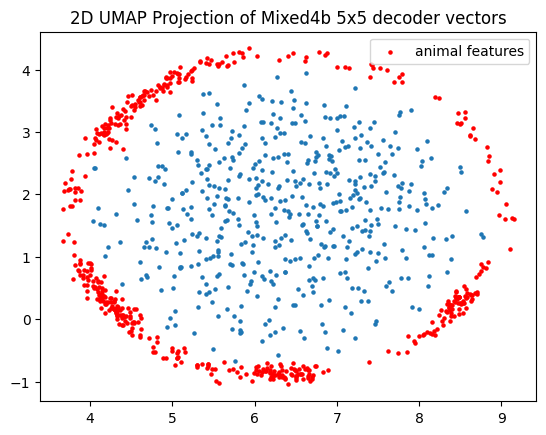

In [ ]:
plt.scatter(embedding_full[:, 0], embedding_full[:, 1], s=5)
plt.scatter(embedding_subset[:,0],embedding_subset[:,1],s=5,color="red",label="animal features")
plt.title("2D UMAP Projection of Mixed4b 5x5 decoder vectors")

plt.legend()
plt.savefig("mixed4b_5x5_projection.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
dic2=[3341,
3221,
3185,
3021,
2489,
2475,
2417,
2325,
2293,
2278,
2156,
2091,
1891,
1755,
1421,
1415,
1210,
851,
736,
602,
543,
371,
224,
118,
7764,
5099,
4829,
1543,
8109,
8052,
7845,
7807,
7794,
7620,
7488,
7209,
7161,
6518,
6418,
6141,
6054,
5921,
5656,
7994,
7379,
6809,
3290,
3183,
3167,
2966,
2929,
2902,
2523,
2046,
1882,
1630,
1495,
1466,
1297,
1285,
1279,
1231,
1216,
1083,
999,
386,
368,
206,
27,
7516,
7279,
6690,
6641,
4988,
4583,
3553,
3359,
1485,
526,
119,
7028,
7003,
6412,
6091,
5599,
5532,
5245,
4966,
4861,
3959,
3474,
2637,
2612,
2590,
2426,
2335,
2051,
2021,
1888,
1504,
1345,
1333,
1261,
1024,
595,
7162,
7086,
6599,
6585,
6487,
6391,
6316,
6240,
6020,
5894,
5883,
5691,
5114,
5088,
5076,
4915,
4856,
4797,
4752,
4674,
4589,
4573,
4430,
4358,
4271,
4055,
3203,
2693,
2646,
2634
]


cat_list_2=[]
for i in range(8192):
  if i in dic2:
    cat_list_2.append(model_1.W_dec.weight[:,i])
new_tensor_2=torch.stack(cat_list_2,dim=1)
print(new_tensor_2[:,0].shape)


torch.Size([512])


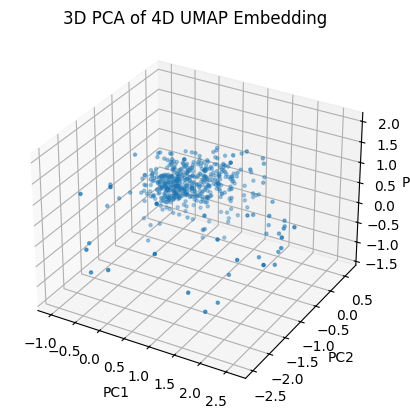

In [ ]:
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necessary for 3D plotting

# Assume 'data' is your original high-dimensional data
# First, embed your data to 4D using UMAP


# Now reduce the 4D embedding to 3D using PCA
pca = PCA(n_components=3)
embedding_3d = pca.fit_transform(embedding_subset)

# Plotting the resulting 3D embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding_3d[:, 0], embedding_3d[:, 1],embedding_3d[:,2] ,s=5)
ax.set_title("3D PCA of 4D UMAP Embedding")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()